In [27]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [28]:
gt_points = torch.load('/home/mohamed/repos/pose_estimation_task/SPIN/open_pose_example/gt_keypoints_2d.pt')
images = torch.load('/home/mohamed/repos/pose_estimation_task/SPIN/open_pose_example/images.pt')

/tmp/ipykernel_332872/3209953224.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  gt_points = torch.load('/home/mohamed/repos/pose_estimation_task/SPIN/open_pose_example/

In [29]:
# to cpu to numpy
gt_points = gt_points.cpu()
gt_points = gt_points.numpy()
# shape
print(f'gt_points shape: {gt_points.shape}')

# to cpu to numpy
images = images.cpu()
images = images.numpy()
# shape
print(f'images shape: {images.shape}')


gt_points shape: (2, 49, 3)
images shape: (2, 3, 224, 224)


In [30]:
image = images[1]
gt_point = gt_points[1]
print(f'image shape: {image.shape}')
print(f'gt_point shape: {gt_point.shape}')


image shape: (3, 224, 224)
gt_point shape: (49, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


image shape: (224, 224, 3)


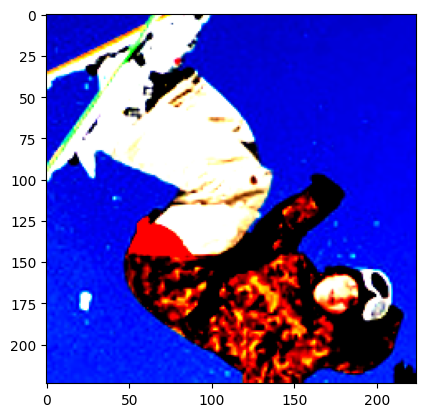

In [31]:
#plot image
image = image.transpose(1, 2, 0)
print(f'image shape: {image.shape}')
plt.imshow(image)


In [32]:
# points_openpose is the last 25 points
points_openpose = gt_point[-25:]
print(f'points_openpose shape: {points_openpose.shape}')

points_openpose shape: (25, 3)


In [33]:
import matplotlib.pyplot as plt

def plot_openpose_keypoints(image, keypoints):
    """
    Plots an image with OpenPose keypoints overlaid and numbered.

    Args:
        image (np.ndarray): The image as a NumPy array (HxWxC).
        keypoints (np.ndarray): A (25, 3) array of OpenPose keypoints (x, y, v).
                                Only valid points (x, y, v != 0) are plotted.
    """
    assert keypoints.shape == (25, 3), "Keypoints array must have shape (25, 3)"
    
    # Flip the y-axis for proper image orientation in matplotlib
    image_height, image_width = image.shape[:2]
    
    # Plot the image
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    plt.axis("off")
    
    # Define OpenPose keypoint names
    keypoint_names = [
        "Nose", "Neck", "RShoulder", "RElbow", "RWrist",
        "LShoulder", "LElbow", "LWrist", "MidHip", "RHip",
        "RKnee", "RAnkle", "LHip", "LKnee", "LAnkle",
        "REye", "LEye", "REar", "LEar", "LBigToe",
        "LSmallToe", "LHeel", "RBigToe", "RSmallToe", "RHeel"
    ]
    
    # Iterate through the keypoints and plot valid ones
    for i, (x, y, v) in enumerate(keypoints):
        print(f"Keypoint {i} ({keypoint_names[i]}): ({x}, {y}, {v})")

        if x > 0 and y > 0 and v > 0:  # Only plot valid points
            x = int(x * image_width)
            y = int(y * image_height)
            v = int(v)
            plt.plot(x, y, "ro")  # Red dot for keypoint
            plt.text(
                x + 5, y, f"{i} ({keypoint_names[i]})",
                color="yellow", fontsize=10, bbox=dict(facecolor="black", alpha=0.5)
            )
            print(f"Keypoint {i} ({keypoint_names[i]}): ({x}, {y}, {v})")
    
    plt.title("Image with OpenPose Keypoints")
    plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


Keypoint 0 (Nose): (-4.3125, -2.044642925262451, 0.0)
Keypoint 1 (Neck): (-0.3660714328289032, -0.5714285969734192, 1.0)
Keypoint 2 (RShoulder): (0.0982142835855484, -0.125, 1.0)
Keypoint 3 (RElbow): (-0.2142857164144516, 0.3214285671710968, 1.0)
Keypoint 4 (RWrist): (-0.2857142984867096, 0.3660714328289032, 1.0)
Keypoint 5 (LShoulder): (0.02678571455180645, -0.0982142835855484, 1.0)
Keypoint 6 (LElbow): (-0.5089285969734192, -0.3571428656578064, 1.0)
Keypoint 7 (LWrist): (0.4553571343421936, 0.0357142873108387, 1.0)
Keypoint 7 (LWrist): (101, 8, 1)
Keypoint 8 (MidHip): (0.2321428507566452, 0.1875, 1.0)
Keypoint 8 (MidHip): (51, 42, 1)
Keypoint 9 (RHip): (0.3125, 0.3839285671710968, 1.0)
Keypoint 9 (RHip): (70, 85, 1)
Keypoint 10 (RKnee): (0.3571428656578064, 0.7589285969734192, 1.0)
Keypoint 10 (RKnee): (80, 170, 1)
Keypoint 11 (RAnkle): (0.0982142835855484, 0.9910714030265808, 1.0)
Keypoint 11 (RAnkle): (21, 221, 1)
Keypoint 12 (LHip): (0.5446428656578064, 0.8482142686843872, 1.0)
Ke

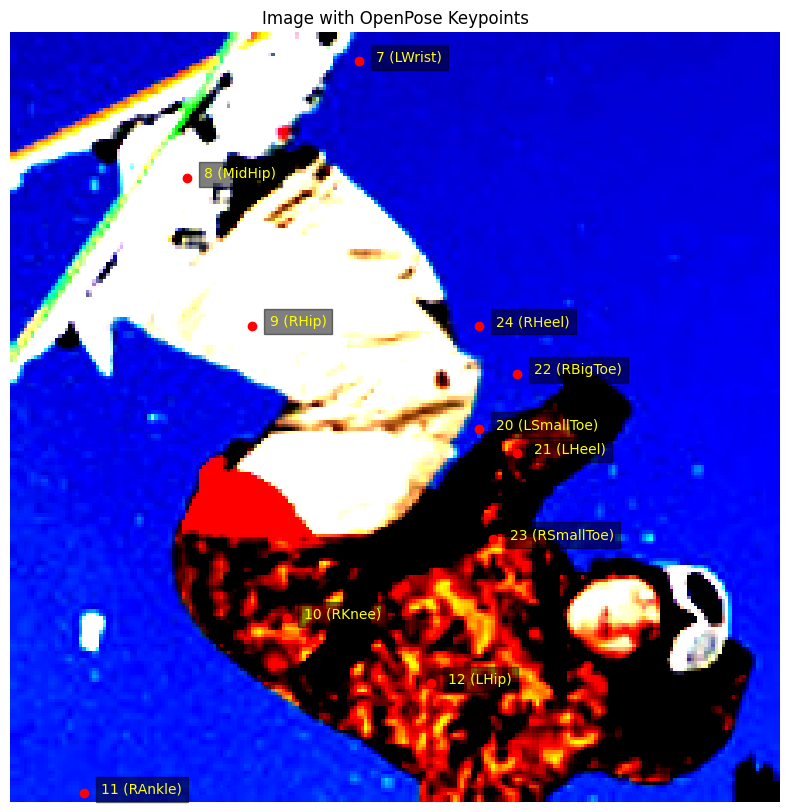

In [34]:
plot_openpose_keypoints(image, points_openpose)

In [36]:
keypoint_names = [
    "Nose", "Neck", "RShoulder", "RElbow", "RWrist",
    "LShoulder", "LElbow", "LWrist", "MidHip", "RHip",
    "RKnee", "RAnkle", "LHip", "LKnee", "LAnkle",
    "REye", "LEye", "REar", "LEar", "LBigToe",
    "LSmallToe", "LHeel", "RBigToe", "RSmallToe", "RHeel"
]

for i in range(len(points_openpose)):
    print(f"Keypoint {i} ({keypoint_names[i]}): {points_openpose[i]}")
    

Keypoint 0 (Nose): [-4.3125   -2.044643  0.      ]
Keypoint 1 (Neck): [-0.36607143 -0.5714286   1.        ]
Keypoint 2 (RShoulder): [ 0.09821428 -0.125       1.        ]
Keypoint 3 (RElbow): [-0.21428572  0.32142857  1.        ]
Keypoint 4 (RWrist): [-0.2857143   0.36607143  1.        ]
Keypoint 5 (LShoulder): [ 0.02678571 -0.09821428  1.        ]
Keypoint 6 (LElbow): [-0.5089286  -0.35714287  1.        ]
Keypoint 7 (LWrist): [0.45535713 0.03571429 1.        ]
Keypoint 8 (MidHip): [0.23214285 0.1875     1.        ]
Keypoint 9 (RHip): [0.3125     0.38392857 1.        ]
Keypoint 10 (RKnee): [0.35714287 0.7589286  1.        ]
Keypoint 11 (RAnkle): [0.09821428 0.9910714  1.        ]
Keypoint 12 (LHip): [0.54464287 0.84821427 1.        ]
Keypoint 13 (LKnee): [-4.3125   -2.044643  0.      ]
Keypoint 14 (LAnkle): [-4.3125   -2.044643  0.      ]
Keypoint 15 (REye): [-4.3125   -2.044643  0.      ]
Keypoint 16 (LEye): [-4.3125   -2.044643  0.      ]
Keypoint 17 (REar): [-4.3125   -2.044643  0.  